In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
# Load dataset
dataset1 = pd.read_csv("prep.csv", index_col=None)

# Create copy of dataset
df2 = dataset1.copy()

# One-hot encode categorical variables
df2 = pd.get_dummies(df2, drop_first=True)

# Split data into independent (X) and dependent (Y) variables
indep_X = df2.drop(columns=['classification_yes'])
dep_Y = df2['classification_yes']


In [3]:
df2

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,False,False,False,False,False,True,False,True,True
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,True,False,False,False,False,False,True,False,False,True
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,True,False,False,True,True,False,True,False,True,True
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,True,False,False,True,True,False,False,False,False,True
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,True,False,False,True,True,False,True,False,True,True


In [6]:
# Step 1: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)


In [7]:
# Step 2: Training a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Step 3: Predicting on the test set
y_pred = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
print(f"Model accuracy before permutation: {accuracy_before:.4f}")

Model accuracy before permutation: 0.9667


In [9]:
# Step 4: Applying Permutation Importance
# This will shuffle the values of each feature and evaluate how it impacts the accuracy
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

In [11]:
# Step 5: Displaying the feature importance results
feature_importance_df = pd.DataFrame({
    'Feature': indep_X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std})

In [12]:
# Sorting features by their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance Mean', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)


Feature Importance:
         Feature  Importance Mean  Importance Std
6            sc         0.139167        0.026365
9          hrmo         0.138333        0.019437
12           rc         0.111667        0.019791
2            al         0.105000        0.023921
4           bgr         0.080000        0.015000
5            bu         0.025000        0.008333
25       pe_yes         0.011667        0.006667
0           age         0.000000        0.000000
17   rbc_normal         0.000000        0.000000
24    appet_yes         0.000000        0.000000
23      cad_yes         0.000000        0.000000
22       dm_yes         0.000000        0.000000
21      htn_yes         0.000000        0.000000
20   ba_present         0.000000        0.000000
19  pcc_present         0.000000        0.000000
18    pc_normal         0.000000        0.000000
13         sg_b         0.000000        0.000000
16         sg_e         0.000000        0.000000
15         sg_d         0.000000        0.00000

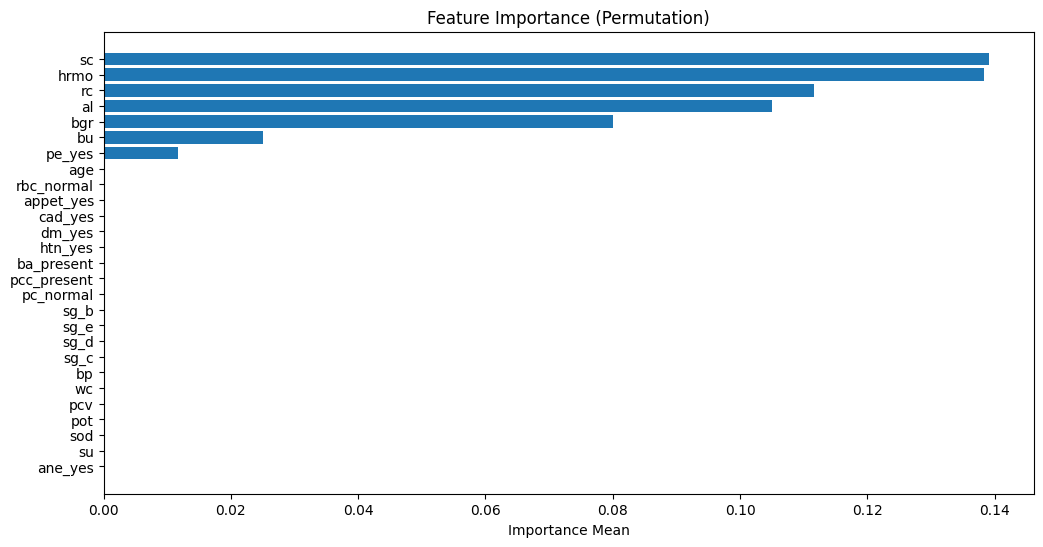

In [17]:
# Step 6: Visualizing Feature Importance (Optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()
